# Confusion matrix and AUC figures
Create the confusion matrix and AUC figures for existing results on the PRISMA dataset.

Test field to look for possible configurations and best looks for the figures in the paper revision.

In [10]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import confusion_matrix

In [11]:
# Load the results
directory = "/mnt/Bessel/Gproj/Gerard_DATA/FAT-SAT"

## PRISMA
results_csv = pd.read_csv(f"{directory}/PRISMA_results/output_probabilities.csv")
print(results_csv["prob"].values)
ypred_prisma = results_csv["prob"].values > 0.5
ytrue_prisma = results_csv["true_label"].values
## SVM

## RF

[0.99538547 0.7769979  0.07038701 0.05852773 0.9972396  0.794497
 0.2005218  0.39082003 0.9679998  0.9530031  0.7051603  0.2027281
 0.98041993 0.13978338 0.10684007 0.46439055 0.40390563 0.8280517
 0.02306372 0.02147642 0.97217125 0.39257652 0.934989   0.03067778
 0.09928033 0.4535843  0.70288926 0.7054592  0.77072537 0.10955016
 0.3644396  0.02225659 0.764534   0.4145753  0.9997336  0.48265064
 0.75400347 0.8360115  0.9689228  0.9880084  0.41545033 0.9714084
 0.9737767  0.12622792 0.037176   0.05309894 0.9986675  0.9999635
 0.77718717 0.5185776  0.08435898 0.37348622 0.89134884 0.661388
 0.9547491  0.00881902 0.9774072  0.92126983 0.5345291  0.49590886
 0.30537227 0.03141385 0.5207571  0.34315923 0.07177018 0.98651195
 0.40197888 0.66701674 0.5542885  0.8922631  0.238935   0.5474823
 0.24954516 0.999948   0.01551321 0.06171617 0.749532   0.94306684
 0.00870824 0.9596898  0.9865871  0.988663   0.8747902  0.95128703
 0.12556213 0.99941516 0.64961606 0.00675587 0.04951846 0.9751472
 0.45

[[58 52]
 [ 3 11]]


<AxesSubplot:>

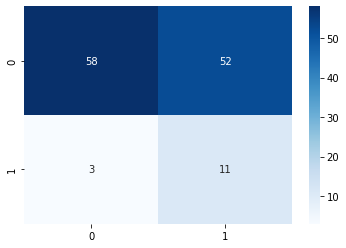

In [14]:
# DO the confusion matrix
cf_matrix = confusion_matrix(ytrue_prisma, ypred_prisma)
print(cf_matrix)

sns.heatmap(cf_matrix, annot=True, cmap='Blues') # fmt='.2%', 

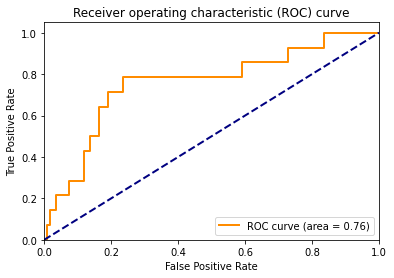

In [17]:
# Do the AUC
# Compute ROC curve and ROC area for each class

fpr, tpr, _ = roc_curve(ytrue_prisma, results_csv["prob"].values)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(
    fpr,
    tpr,
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc,
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic (ROC) curve")
plt.legend(loc="lower right")
plt.show()